In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [27]:
v2_prototxt = "colorization_deploy_v2.prototxt"
caffemodel = "colorization_release_v2.caffemodel"
points = "pts_in_hull.npy"
input_image = "Einstein_1939.jpg"

In [28]:
net = cv2.dnn.readNetFromCaffe(v2_prototxt,caffemodel)
points = np.load(points)

In [29]:
class8 = net.getLayerId("class8_ab")
conv8 = net.getLayerId("conv8_313_rh")
pts = points.transpose().reshape(2, 313, 1, 1)
net.getLayer(class8).blobs = [pts.astype("float32")]
net.getLayer(conv8).blobs = [np.full([1, 313], 2.606, dtype="float32")]

In [30]:
image = cv2.imread(input_image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
scaled = image.astype("float32") / 255.0
lab = cv2.cvtColor(scaled, cv2.COLOR_RGB2LAB)

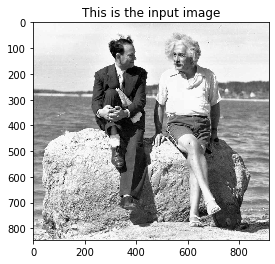

In [31]:
plt.imshow(image)
plt.axis('on');
plt.title('This is the input image');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


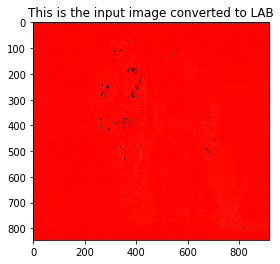

In [32]:
plt.imshow(lab)
plt.axis('on');
plt.title('This is the input image converted to LAB');

In [33]:
resized_image = cv2.resize(lab, (224, 224))
L_channel = cv2.split(resized_image)[0]
L_channel -= 50
net.setInput(cv2.dnn.blobFromImage(L_channel))
a_and_b = net.forward()[0, :, :, :].transpose((1, 2, 0))
ab = cv2.resize(a_and_b, (image.shape[1], image.shape[0]))
L = cv2.split(lab)[0]
LAB_colorized = np.concatenate((L[:, :, np.newaxis], ab), axis=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


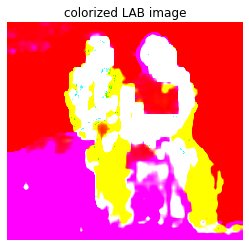

In [34]:
plt.imshow(LAB_colorized)
plt.axis('off');
plt.title('colorized LAB image');

In [35]:
lab_to_rgb_colorized = cv2.cvtColor(LAB_colorized, cv2.COLOR_LAB2RGB)
clipped_colorized = np.clip(lab_to_rgb_colorized, 0, 1)
colorized = (255 * clipped_colorized).astype("uint8")

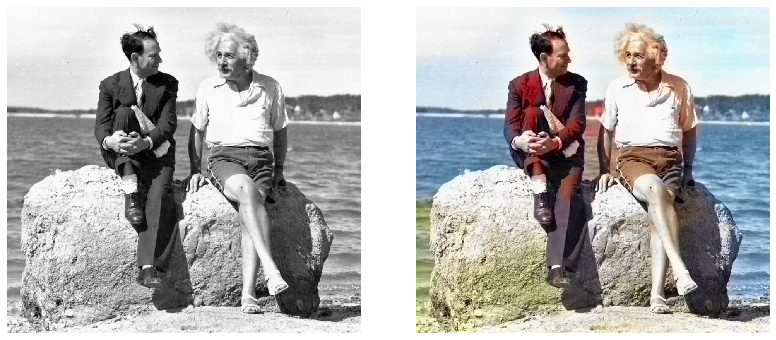

In [36]:
plt.figure(1, figsize=(14,6))
plt.subplots_adjust(wspace=0.1)
plt.subplot(121)
plt.axis('off');
plt.imshow(image);

plt.subplot(122)
plt.axis('off');
plt.imshow(colorized);